# Libraries and Data

In [40]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [41]:
# Loading the Data and Setting the Index

df = pd.read_csv('./Daily Bike Sharing training.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
# Change the Time Series variable name
df = df.rename(columns={'cnt': 'y', 
                        'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format='mixed')
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
# Prepare the weather situation variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, weather_sit], axis=1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [46]:
# Renaming variables 2 and 3
df = df.rename(columns={2: 'weathersit_2', 
                        3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [47]:
# Drop Variables That Are Not Needed
df.drop(columns=['instant', 'season', 'yr', 'mnth', 'weekday', 'casual', 'registered'], inplace=True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [87]:
# Look at 2012-10-29
df[df.ds == '2012-10-29']

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
667,2012-10-29,0,1,3,0.44,0.4394,0.88,0.3582,22,False,True


In [91]:
# Replace 29/30 of October 2012 with the value of 28th
# 28th because in EDA because weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

# Exploring Data Analysis

In [48]:
# Create a copy of the df with index
df_temp = df.copy()
df_temp.set_index('ds', inplace=True)

In [49]:
# Setting Daily Frequency
df_temp.index.freq="D"
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='ds', length=731, freq='D')

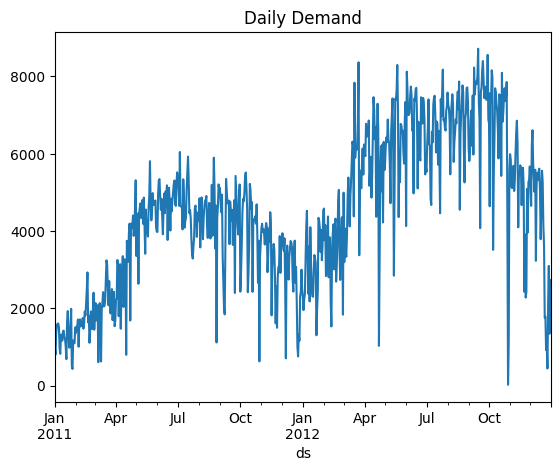

In [50]:
# Daily Demand Plot
df_temp['y'].plot(title='Daily Demand')
plt.show()

/var/folders/4n/9tbxngb515vgp1svpmv0zrhc0000gn/T/ipykernel_89582/1229701502.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df_temp['y'].resample('M').mean(),


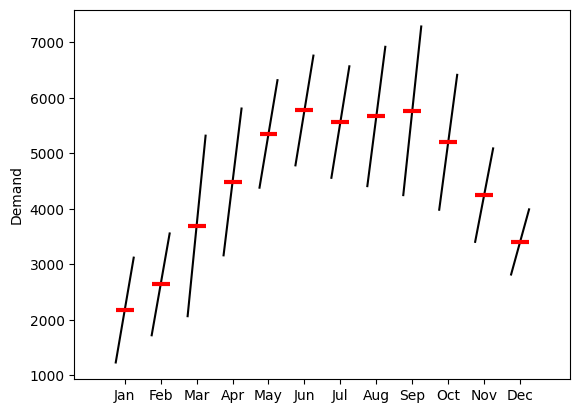

In [51]:
# Plotting the monthly seasonality
month_plot(df_temp['y'].resample('M').mean(),
           ylabel='Demand')
plt.show()

/var/folders/4n/9tbxngb515vgp1svpmv0zrhc0000gn/T/ipykernel_89582/3675908058.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean(),


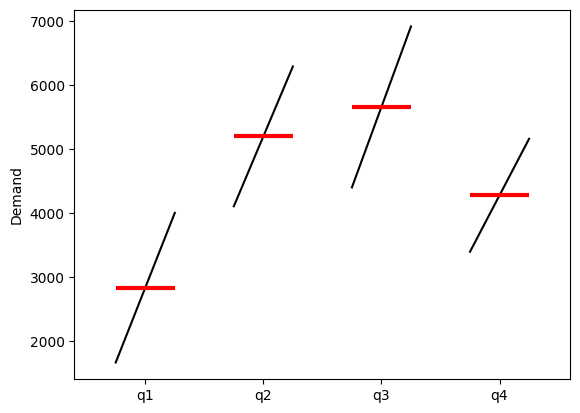

In [52]:
# Plotting the quarterly seasonality
quarter_plot(df_temp['y'].resample('Q').mean(),
             ylabel='Demand')
plt.show()

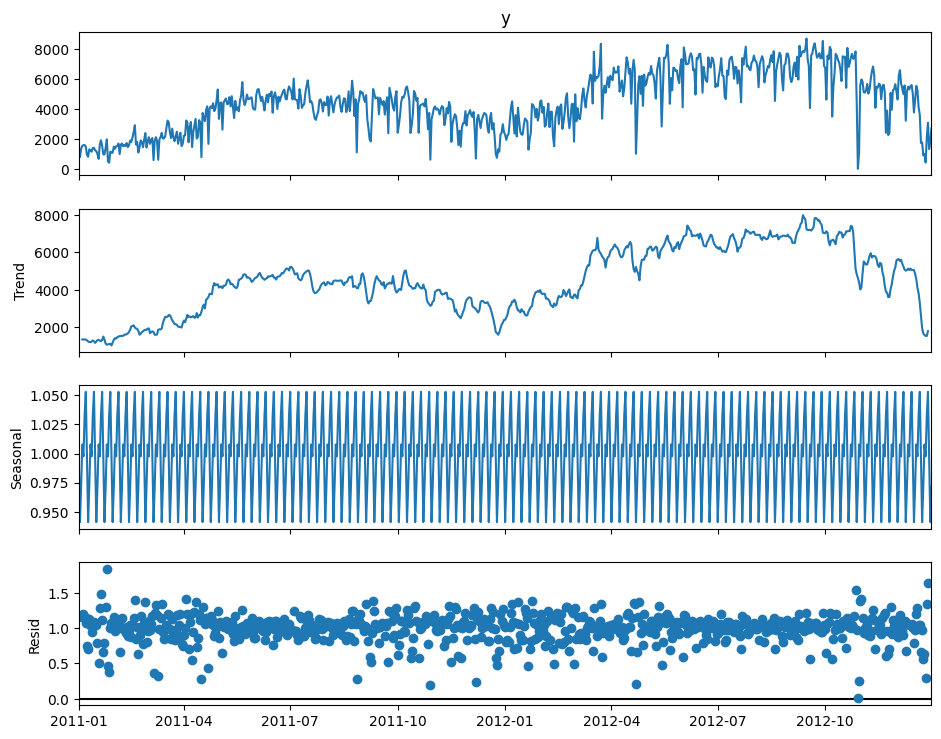

In [53]:
# Seasonal Decomposition Plots
decomposition = seasonal_decompose(df_temp['y'],
                                   model='mul',
                                   period=7)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

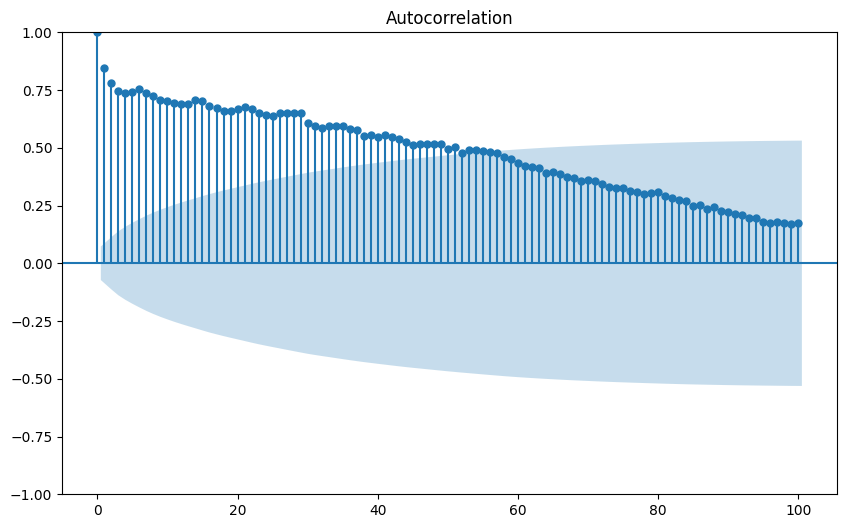

In [54]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df_temp['y'], lags=100, ax=ax)
plt.show()

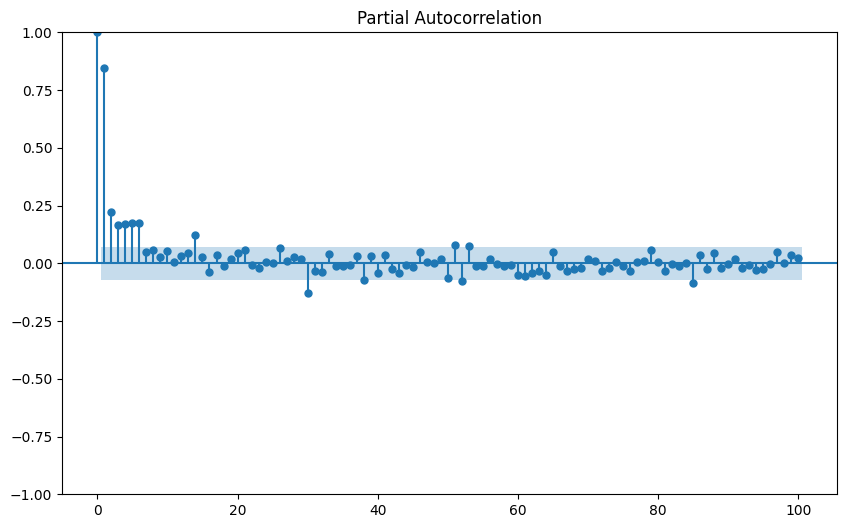

In [55]:
# Plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df_temp['y'], lags=100, ax=ax)
plt.show()

# Holiday

In [56]:
# Check the holiday in our df
df[df.holiday == 1].ds

16    2011-01-17
51    2011-02-21
104   2011-04-15
149   2011-05-30
184   2011-07-04
247   2011-09-05
282   2011-10-10
314   2011-11-11
327   2011-11-24
359   2011-12-26
366   2012-01-02
380   2012-01-16
415   2012-02-20
471   2012-04-16
513   2012-05-28
550   2012-07-04
611   2012-09-03
646   2012-10-08
681   2012-11-12
691   2012-11-22
724   2012-12-25
Name: ds, dtype: datetime64[ns]

In [59]:
# Holidays
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
xmas = pd.DataFrame({'holiday': 'christmas',
                      'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -3,
                             'upper_window': 3})
nye = pd.DataFrame({'holiday': 'new_years',
                      'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
easter = pd.DataFrame({'holiday': 'easter',
                      'ds': pd.to_datetime(['2011-04-24', '2012-04-8']),
                             'lower_window': -3,
                             'upper_window': 3})

In [60]:
# Combine all the holiday
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


# Prophet Model

In [61]:
# Look at df
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False


In [62]:
# Remove any NAs
df = df.dropna()

In [64]:
from prophet import Prophet

/Users/sothulthorn/HardDrive/Code/projects/machine-learning/time-series-analysis-and-forecasting-with-python/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [92]:
# Building the Prophet model
m = Prophet(holidays=holidays,
            seasonality_mode='multiplicative',
            seasonality_prior_scale=10,
            holidays_prior_scale=10,
            changepoint_prior_scale=0.05)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.fit(df)

21:51:02 - cmdstanpy - INFO - Chain [1] start processing
21:51:02 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
# Regressor Coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.254386,0.254386,0.254386
1,temp,multiplicative,0.495385,0.721152,0.721152,0.721152
2,atemp,multiplicative,0.474354,0.370798,0.370798,0.370798
3,hum,multiplicative,0.627894,-0.378357,-0.378357,-0.378357
4,windspeed,multiplicative,0.190486,-0.601479,-0.601479,-0.601479
5,weathersit_2,multiplicative,0.000000,-0.108176,-0.108176,-0.108176
6,weathersit_3,multiplicative,0.000000,-0.420483,-0.420483,-0.420483


In [94]:
def interpret_prophet_coefficients(df):
    interpretations = []

    for _, row in df.iterrows():
        regressor = row['regressor']
        mode = row['regressor_mode']
        coef = row['coef']

        direction = "increase" if coef > 0 else "decrease"
        magnitude = abs(coef)

        if mode == 'multiplicative':
            percent_change = magnitude * 100
            interpretation = (
                f"For each one-unit increase in {regressor}, the target variable is expected "
                f"to {direction} by approximately {percent_change:.2f}% multiplicatively "
                f"(relative to the trend)."
            )

        elif mode == 'additive':
            interpretation = (
                f"For each one-unit increase in {regressor}, the target variable is expected "
                f"to {direction} by approximately {magnitude:.4f} units additively."
            )

        else:
            interpretation = f"Regressor {regressor} has an unknown mode: {mode}."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))
interpretations = interpret_prophet_coefficients(coefs)
for interpretation in interpretations:
  print(interpretation)

For each one-unit increase in workingday, the target variable is expected to increase by approximately 25.44% multiplicatively (relative to the trend).
For each one-unit increase in temp, the target variable is expected to increase by approximately 72.12% multiplicatively (relative to the trend).
For each one-unit increase in atemp, the target variable is expected to increase by approximately 37.08% multiplicatively (relative to the trend).
For each one-unit increase in hum, the target variable is expected to decrease by approximately 37.84% multiplicatively (relative to the trend).
For each one-unit increase in windspeed, the target variable is expected to decrease by approximately 60.15% multiplicatively (relative to the trend).
For each one-unit increase in weathersit_2, the target variable is expected to decrease by approximately 10.82% multiplicatively (relative to the trend).
For each one-unit increase in weathersit_3, the target variable is expected to decrease by approximately 

# Cross-Validation

In [69]:
from prophet.diagnostics import cross_validation

In [95]:
# Apply the CV to the model
df_cv = cross_validation(model=m,
                         period='15 days',
                         initial='521 days',
                         horizon='30 days',
                         parallel='processes')

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
21:51:15 - cmdstanpy - INFO - Chain [1] done processing
21:51:15 - cmdstanpy - 

In [96]:
# Look at the CV output
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8156.488150,7484.028106,8884.996982,6211,2012-06-19
1,2012-06-21,8641.726360,7927.794031,9304.677352,5905,2012-06-19
2,2012-06-22,8324.753941,7609.349032,9001.711172,5823,2012-06-19
3,2012-06-23,7904.781294,7181.330250,8638.873771,7458,2012-06-19
4,2012-06-24,7974.171567,7226.399018,8660.827519,6891,2012-06-19


In [97]:
# Performance Metrics
from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.437730e+06,1199.053815,910.537878,0.159888,0.109151,0.154731,0.611111
1,4 days,1.333963e+06,1154.973105,853.334689,0.143914,0.105660,0.140494,0.666667
2,5 days,1.390830e+06,1179.334758,908.183709,0.150438,0.109443,0.145850,0.611111
3,6 days,1.330658e+06,1153.541632,883.816005,0.164448,0.104446,0.149235,0.611111
4,7 days,1.455512e+06,1206.446183,934.481958,0.173776,0.111440,0.159864,0.555556
5,8 days,1.423711e+06,1193.193623,903.417108,0.185148,0.112832,0.162587,0.555556
6,9 days,1.279932e+06,1131.340653,876.598900,0.175685,0.125491,0.156723,0.527778
7,10 days,1.598485e+06,1264.311979,971.249928,0.188217,0.128609,0.167783,0.472222
8,11 days,1.499469e+06,1224.528158,909.222261,0.158492,0.098144,0.148400,0.583333
9,12 days,1.642118e+06,1281.451492,961.777291,0.152875,0.102716,0.154476,0.555556


In [98]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(), 0)
mape = round(performance_metrics(df_cv)['mape'].mean() * 100, 3)

print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape}")

The RMSE is 1233.0
The MAPE is 18.652


/Users/sothulthorn/HardDrive/Code/projects/machine-learning/time-series-analysis-and-forecasting-with-python/venv/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/sothulthorn/HardDrive/Code/projects/machine-learning/time-series-analysis-and-forecasting-with-python/venv/lib/python3.11/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


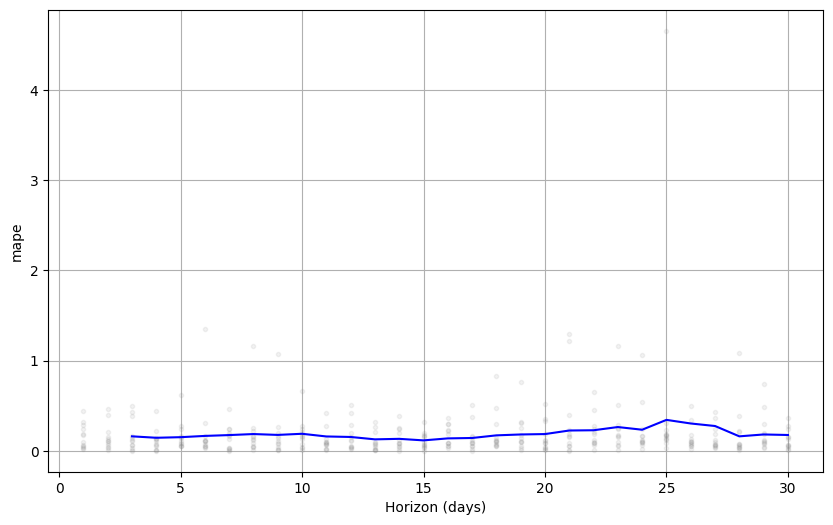

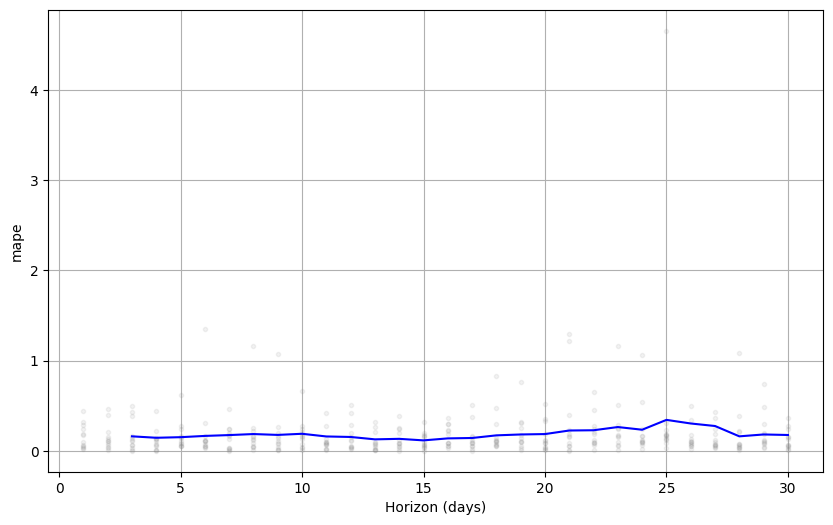

In [99]:
# Plotting the metrics overtime
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')

# Exploring the Errors

In [100]:
# Compute the Error / deviation
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
df_cv['deviation_%'] = (df_cv['yhat'] / df['y'] - 1) * 100

In [101]:
# Days with the highest deviation
df_cv.sort_values(by='deviation', ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
17,2012-07-07,8856.855821,8172.170978,9552.202815,4840,2012-06-19,4016.855821,1196.757807
9,2012-06-29,9096.207804,8421.607322,9774.143427,5463,2012-06-19,3633.207804,588.584997
18,2012-07-08,8256.863577,7533.669292,8967.230084,4672,2012-06-19,3584.863577,400.415974
305,2012-11-22,5703.920042,4915.063396,6516.873575,2425,2012-11-16,3278.920042,36.261826
290,2012-11-22,5570.529010,4804.300078,6404.801533,2425,2012-11-01,3145.529010,17.323694
11,2012-07-01,8342.431501,7624.084586,9007.097323,5531,2012-06-19,2811.431501,617.937306
1,2012-06-21,8641.726360,7927.794031,9304.677352,5905,2012-06-19,2736.726360,978.867211
292,2012-11-24,4918.891290,4127.803310,5744.694525,2277,2012-11-01,2641.891290,17.256050
307,2012-11-24,4914.230968,4106.906436,5744.950371,2277,2012-11-16,2637.230968,21.458996
308,2012-11-25,5030.879234,4264.097214,5867.568417,2424,2012-11-16,2606.879234,28.142619


In [102]:
# Days with the lowest deviation
df_cv.sort_values(by='deviation', ascending=True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
47,2012-07-22,3872.433403,3163.397810,4616.600435,7410,2012-07-04,-3537.566597,56.461956
88,2012-08-17,3689.830107,2915.646167,4510.190216,7148,2012-07-19,-3458.169893,140.223314
50,2012-07-25,4928.458518,4193.157789,5714.702370,8173,2012-07-04,-3244.541482,171.989984
57,2012-08-01,4670.878562,3935.766811,5383.973088,7580,2012-07-04,-2909.121438,94.457892
62,2012-07-22,4544.235155,3711.228868,5306.276618,7410,2012-07-19,-2865.764845,133.756952
103,2012-08-17,4398.278489,3617.413935,5217.387209,7148,2012-08-03,-2749.721511,34.627441
49,2012-07-24,4917.601723,4174.480025,5639.288906,7592,2012-07-04,-2674.398277,200.770748
56,2012-07-31,4614.393872,3837.852920,5357.719913,7216,2012-07-04,-2601.606128,134.352152
59,2012-08-03,4597.047538,3858.796971,5321.538556,7175,2012-07-04,-2577.952462,148.354810
65,2012-07-25,5620.546601,4800.364849,6420.410373,8173,2012-07-19,-2552.453399,200.242874
